In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy as sc
from numpy.lib.stride_tricks import sliding_window_view

In [2]:
from magnet import Magnet

In [3]:
def mavg(x):
    return np.average(sliding_window_view(x, window_shape = 4), axis=1)

In [4]:
data_quad=np.loadtxt("field_map_straight_quad_resol_2mm.txt",skiprows=9)
quad = Magnet(data_quad)

In [5]:
data_cutquad=np.loadtxt("field_map_quad_edge_30deg_resol_2mm.txt",skiprows=9)
cutquad = Magnet(data_cutquad)

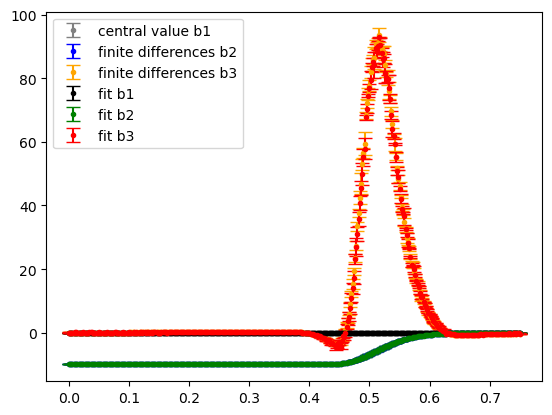

In [6]:
fig, ax = plt.subplots()
ax.errorbar(np.unique(cutquad.src['z']), [cutquad.get_b1(z)[0] for z in np.unique(cutquad.src['z'])], yerr=[cutquad.get_b1(z)[1] for z in np.unique(cutquad.src['z'])], label='central value b1', color='gray', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [ cutquad.get_b2(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b2(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b2', ls='', marker='.', color='blue', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), [ cutquad.get_b3(z)[0] for z in np.unique(cutquad.src['z']) ], yerr=[ cutquad.get_b3(z)[1] for z in np.unique(cutquad.src['z']) ], label='finite differences b3', ls='', marker='.', color='orange', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,0], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,0], label='fit b1', color='black', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,1], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,1], label='fit b2', color='green', marker='.', ls='', capsize=5)
ax.errorbar(np.unique(cutquad.src['z']), cutquad.z_multipoles(3, xmax=0.025)[1][:,2], yerr=cutquad.z_multipoles(3, xmax=0.025)[2][:,2], label='fit b3', color='red', marker='.', ls='', capsize=5)
ax.legend()

In [10]:
integrated_b1 = np.trapezoid([cutquad.get_b1(z)[0] for z in np.unique(quad.src['z'])])
integrated_b2 = np.trapezoid([cutquad.get_b2(z)[0] for z in np.unique(quad.src['z'])])
integrated_b3 = np.trapezoid([cutquad.get_b3(z)[0] for z in np.unique(quad.src['z'])])
print(f"Integrated b1: {integrated_b1}")
print(f"Integrated b2: {integrated_b2}")
print(f"Integrated b3: {integrated_b3}")
xtest=0.025
print(f"Integrated effect at x={xtest}: {integrated_b1}")
print(f"Integrated effect at x={xtest}: {integrated_b2*xtest}")
print(f"Integrated effect at x={xtest}: {integrated_b3*xtest**2/2.0}")

Integrated b1: 4.8545508269904625
Integrated b2: -2611.5126984333297
Integrated b3: 3124.5094476226955
Integrated effect at x=0.025: 4.8545508269904625
Integrated effect at x=0.025: -65.28781746083324
Integrated effect at x=0.025: 0.9764092023820925


[np.float64(0.06738291898998061),
 np.float64(-6.734659917702118),
 np.float64(79.21791370554637)]

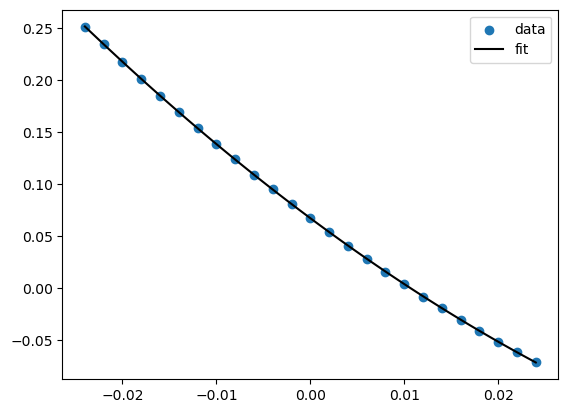

In [56]:
fig, ax = plt.subplots()
coeffs, x, fieldvals = cutquad.fit_xprofile(0, 0.5, "By", 2, ax=ax, xmax=0.025, returndata=True)
coeffs

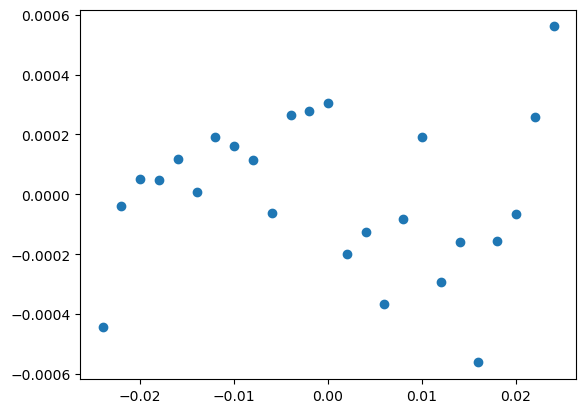

In [57]:
fig, ax = plt.subplots()
ax.scatter(x, fieldvals - coeffs[0] -  coeffs[1]*x - coeffs[2]*x**2/2, label="data")

/tmp/silke/ipykernel_116297/4046815760.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


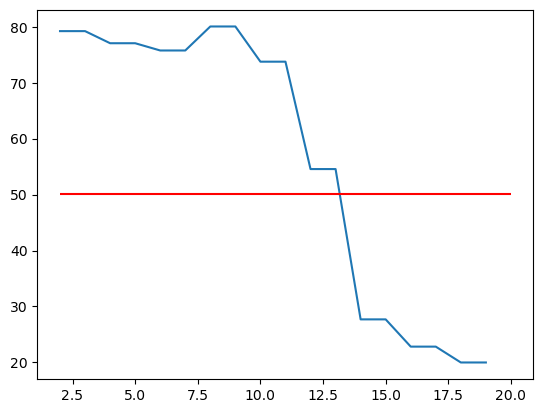

In [58]:
coeffsderiv = cutquad.deriv_xprofile(0, 0.5, "By", 5)
coeffsderiv

b3s = []
for ii in np.arange(2,20):
    coeffs0 = np.array(cutquad.fit_xprofile(0, 0.5, "By", ii, xmax=0.025))
    b3s.append([ii,coeffs0[2]])
b3s=np.array(b3s)

fig,ax = plt.subplots()
ax.plot(b3s[:,0], b3s[:,1])
ax.hlines(coeffsderiv[2],2,20,color="red")
fig.show()
